## Разведывательный анализ данных (EDA)

### Описание задачи


**Суть проекта** — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска, с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика

**основные шаги:**

1. Посмотреть на данные.
2. Проверить количество уникальных значений для номинативных переменных.
3. Проверить данные на пустые значения.
4. Проверить данные на наличие выбросов.
5. Провести корреляционный анализ количественных переменных.
6. Отобрать данные, пригодные для дальнейшего построения модели.
7. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину (в нашем случае —    на переменную score).
8. Сформулировать выводы относительно качества данных и тех переменных, которые не будут использоваться в дальнейшем          для построении модели.


**Описание датасета**

В датасете представлены следующие данные:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

## Первичный отсмотр данных

импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm
import statsmodels.api as sm
import scipy.stats as sst

import warnings
warnings.filterwarnings("ignore")

In [2]:
students = pd.read_csv('stud_math.csv')
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [3]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Всего 395 учеников ;  
30 колонок ;  
13 числовых столбцов ;  
17 строковых столбцов ;  
Есть пропуски во всех колонках кроме school, age, sex. 

## Первичный анализ данных в столбцах.

Колонка 'studytime, granular' отсутствует в описание к датасету, поэтому удалим её, но прежде посмотрим на распределение 'studytime' и 'studytime, granular' для уверенности в своем решении

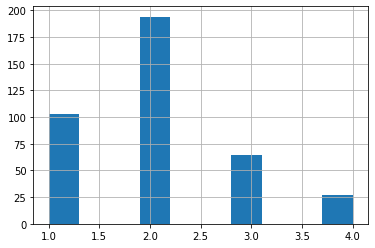

In [4]:
students.studytime.hist()

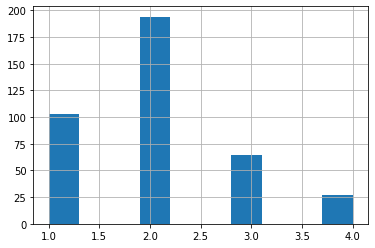

In [5]:
(students['studytime, granular']*(-1/3)).hist()

С моей точки зрения studytime, granular избыточный параметр, дублирует параметр studytime. Поэтому удалим его

In [6]:
students.drop(['studytime, granular'], axis='columns', inplace=True)

Для удобства использования pandas переименуем некоторые столбцы:

In [7]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [8]:
students.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                    'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                    'higher', 'internet', 'romantic', 'fam_rel', 'freetime', 'go_out',
                    'health', 'absences', 'score']
students.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'freetime',
       'go_out', 'health', 'absences', 'score'],
      dtype='object')

Посмотрим сколько не заполненых / пропущенных значений. Методы isna(), sum()

In [9]:
print(students.isna().sum())
print('Всего пропущенных значений: ', students.isna().sum().sum())

school          0
sex             0
age             0
address        17
fam_size       27
p_status       45
m_edu           3
f_edu          24
m_job          19
f_job          36
reason         17
guardian       31
travel_time    28
study_time      7
failures       22
school_sup      9
fam_sup        39
paid           40
activities     14
nursery        16
higher         20
internet       34
romantic       31
fam_rel        27
freetime       11
go_out          8
health         15
absences       12
score           6
dtype: int64
Всего пропущенных значений:  558


Посмотрим на пропуски с помощью heatmap 

Приведенная ниже карта демонстрирует паттерн пропущенных значений. По горизонтальной оси расположены признаки, по вертикальной – количество записей/строк. Темно синий цвет соответствует пропускам данных.

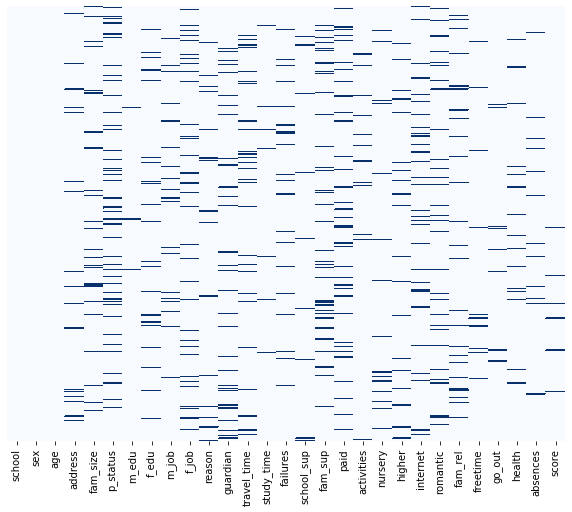

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(students.isnull(), yticklabels=False, cbar=False, cmap='Blues')

**Вывод:** только 3 первых признака school,sex, age без пропусков, все остальные - с пропусками. Карта дает нам общее представление визуализирует пропуски, которые нам необходимо устранить/заполнить для вывода более точного итогового анализа, поэтому мы будем в дальнейшем для надежности рассматривать каждый столбец в отдельности.



## Внесение недостающих значений

На место пропуска можно записать среднее, медианное значение, моду наиболее часто встречающееся значение или рандомное, полученное из остальных записей.

Рассмотрим все 29 столбцов по отдельности

Добавим функцию для вывода соответствующих таблиц и первичных данных, чтобы автоматизировать наши действия и сократить код

In [11]:
def column_info(column):
    if students[column].dtypes == 'object':
        all_indexes = list(students[column].value_counts().index)
        print(students[column].value_counts())
        print('Уникальных значений:', students[column].nunique())
        print('Пропущеных значений в столбце:',
              students[column].isnull().sum(axis=0))

        sns.countplot(students[column])

    else:
        fig, ax = plt.subplots()
        students[column].hist(ax=ax)
        students[column].describe()
        ax.set_xlabel(column)
        plt.show
        print('Медиана: ', students[column].median())
        print("Среднее: ", students[column].mean())
        print('Пропущеных значений в столбце:',
              students[column].isnull().sum(axis=0))

### school

GP    349
MS     46
Name: school, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


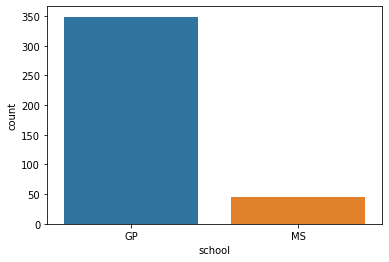

In [12]:
column_info('school')

**Вывод:** большая часть учащихся из датасета учатся в школе GP. Уникальных значений 2 - GP и MS. Пропущеных значений в столбце нет.

### sex

F    208
M    187
Name: sex, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


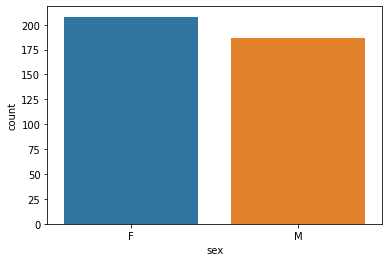

In [13]:
column_info('sex')

**Вывод:** среди учащихся мужчин и женщин примерно поровну, с незначительным преобладанием женщин, пропущенных и ошибочных данных нет

### age

Медиана:  17.0
Среднее:  16.696202531645568
Пропущеных значений в столбце: 0


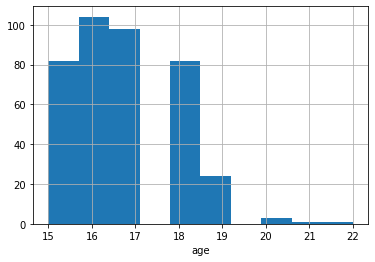

In [14]:
column_info('age')

Предположительно есть выбросы 

Попробуем отфильтровать выбросы и воспользуемся формулой интерквартильного расстояния. Выбросом считаются такие значения, которые лежат вне рамок [Q1 -1.5IQR : Q3+1.5IQR], где IQR = percentile(75) - percentile(25).

Для начала, посмотрим на boxplot для признака age. Данный вид графика делит данные на 4 части. Та часть данных, которая отделена слева и справа двумя вертикальными линиями (находится внутри коробки) содержит 50% данных, так как левая линия обозначает первый квартиль (25-й перцентиль), а правая линия обозначает третий квартиль (75-й перцентиль). Большой вертикальной линией выделена медиана:

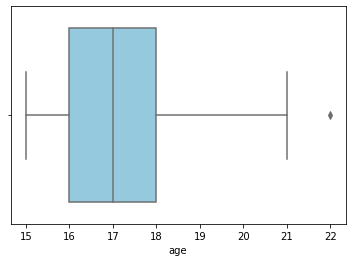

In [15]:
sns.boxplot(students.age, color='skyblue');

Создадим функцию для удаления выбросов, и вернем очищенные данные

In [16]:
def remove_outlier(column):
    quartile1 = students[column].quantile(0.25) 
    quartile3 = students[column].quantile(0.75)
    iqr = quartile3-quartile1  # находим межквартильное расстояние
    fence_low = quartile1-1.5*iqr
    fence_high = quartile3+1.5*iqr
    students_out = students.loc[(students[column] > fence_low) &
                       (students[column] < fence_high)]
    
    return students_out #возращаем только те значения и их индексы, ктр больше fence_low и меньше fence_high

In [17]:
students = remove_outlier('age')

проверяем, что выброс удалился, снова рисуем boxplot и видим, что выбросов больше нет

In [18]:
students.age.value_counts(dropna=False, normalize=True)

16    0.264631
17    0.249364
18    0.208651
15    0.208651
19    0.061069
20    0.007634
Name: age, dtype: float64

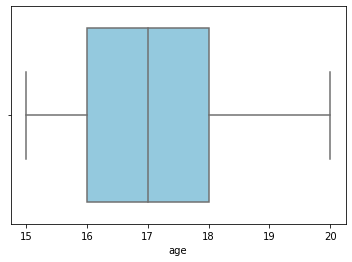

In [19]:
sns.boxplot(students.age, color='skyblue');

поскольку age количественный признак,построю гистограмму распределения еще и с помощью библиотеки Seaborn, Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Сделала для age и целевой переменной score

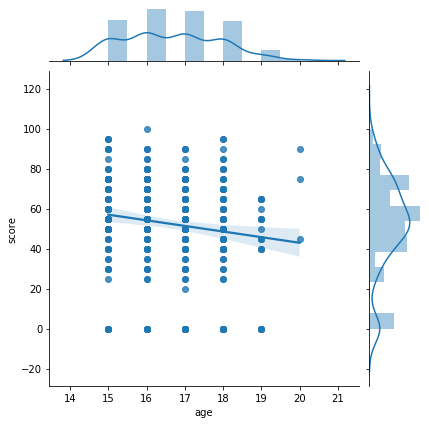

In [20]:
sns.jointplot(x = 'age', y = 'score', data = students, kind = 'reg')

**Вывод:** в колонке age не было пропусков, но был 1 выброс - 22 года, мы нашли этот выброс с помощью boxplot и формулы интерквартильного расстояния, строку с выбросом удалили.Учащиеся с возрастом 20 лет и 21 год составляют менее одного процента совокупно. Распределение похоже на нормальное, из регрессии на графике видно, что есть обратная зависимость между возратом и результатом экзамена

### address

U    294
R     82
Name: address, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 17


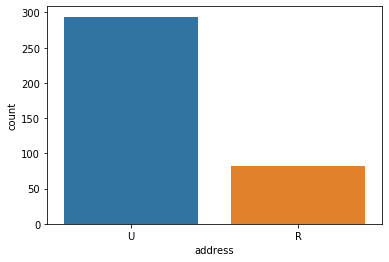

In [21]:
column_info('address')

есть пропущеные значения, заменим их на моду / наиболее часто встречающееся  значение "U" 

In [22]:
students.address = students.address.apply(lambda x: students.address.mode()[0] if pd.isna(x) else x)

проверяем, что больше нет пропусков для типа адреса ученика

In [23]:
pd.DataFrame(students.address.value_counts(dropna=False, normalize=True))

,address
U,0.791349
R,0.208651


**Вывод:** В колонке address не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - U, преобладающее количество студентов (примерно 80%) живет в городе

### fam_size

GT3    259
LE3    107
Name: fam_size, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 27


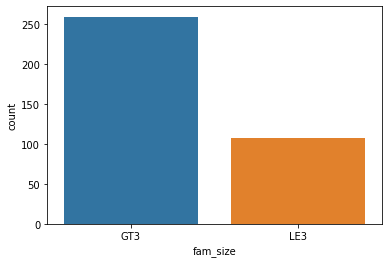

In [24]:
column_info('fam_size')

Есть пропуски; уникальных значений 2 - GT3 (размер семьи'GT3' >3) и LE3(размер семьи'LE3' <= 3), других значений нет, значит в данных нет опечаток

сделаем замену пустых значений размера семьи на самое часто встречающееся значение / моду - GT3

In [25]:
students.fam_size = students.fam_size.apply(
    lambda x: students.fam_size.mode()[0] if pd.isna(x) else x)

In [26]:
pd.DataFrame(students.fam_size.value_counts(dropna=False, normalize=True))

,fam_size
GT3,0.727735
LE3,0.272265


**Вывод:** в колонке fam_size не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение / моду - GT3, преобладающее количество студентов (примерно 66%) из семей, где больше 3х человек

### p_status

T    312
A     36
Name: p_status, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 45


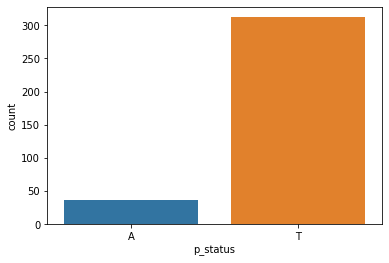

In [27]:
column_info('p_status')

Уникальных значений 2 - T и A (статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)), других значений нет, значит в данных нет опечаток, но есть пропуски. 
Сделаем замену пустых значений размера семьи на самое часто встречающееся значение - T

In [28]:
students['p_status'] = students['p_status'].fillna(students.describe(include = ['object']).p_status.top)

In [29]:
pd.DataFrame(students.p_status.value_counts(dropna=False, normalize=True))

,p_status
T,0.908397
A,0.091603


**Вывод:** В колонке р_status не было ошибочных данных, но было некоторое количество пропусков, которое мы заменили на самое часто встречающееся значение Т, преобладающее количество студентов (примерно 90%) из семей, где родители живут вместе

###  m_edu
       

Медиана:  3.0
Среднее:  2.753846153846154
Пропущеных значений в столбце: 3


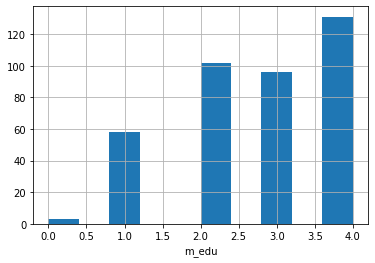

In [30]:
column_info('m_edu')

Уникальных значений 5 (образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))), других значений нет, значит в данных нет опечаток, но есть пропуски. Сделаем замену пустых значений с использованием median значения.

In [31]:
students['m_edu'] = students['m_edu'].apply(lambda x: 3 if pd.isna(x) else x)

In [32]:
pd.DataFrame(students.m_edu.value_counts(dropna=False, normalize=True))

,m_edu
4.0,0.333333
2.0,0.259542
3.0,0.251908
1.0,0.147583
0.0,0.007634


**Вывод:** В колонке m_edu не было выбросов, но были пропуски, которые мы заменили медианым значением. Больше трети матерей имеют высшее образование.

### f_edu 

Медиана:  3.0
Среднее:  2.6233062330623307
Пропущеных значений в столбце: 24


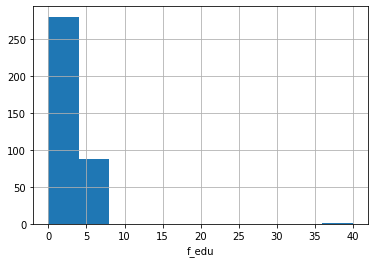

In [33]:
column_info('f_edu')

Есть пропущенные значения, заменим их на случайное числа от 1 до 4 - это наиболее часто встречащиеся в распределении признака значения, так же есть преположительно выбросы

In [34]:
students.f_edu.value_counts(dropna=False, normalize=True)

2.0     0.269720
3.0     0.244275
4.0     0.223919
1.0     0.193384
NaN     0.061069
0.0     0.005089
40.0    0.002545
Name: f_edu, dtype: float64

In [35]:
students['f_edu'] = students['f_edu'].apply(
    lambda x: rnd.randint(1, 4) if pd.isna(x) else x)

При построении boxplotов для категориальных признаков, хорошо видны выбросы

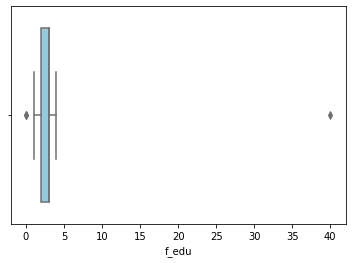

In [36]:
sns.boxplot(students.f_edu, color='skyblue')

Мы можем догадываться: возможно это была "4", но с ошибочным нулем. заменим выброс:

In [37]:
students.loc[students['f_edu'] == 40, 'f_edu'] = 4

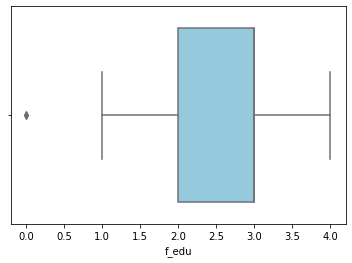

In [38]:
sns.boxplot(students.f_edu, color='skyblue')

После того, как убрали выброс 40, выбросом стало значение 0 - то есть без образования. Но этот выброс убирать не будем, похоже, что в выборке вообще мало учеников, у которых родители без образования

**Вывод :** В колонке f_edu был выброс (возможно ошибочное введение числа) мы его убрали, были пропуски, которые мы заменили на случайные числа от 1 до 4 - как наиболее часто встречащиеся в распределении признака значения. Примерно по четверти распределено образование, без образования совсем не значительное количество 

### m_job 

other       132
services     97
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце: 19


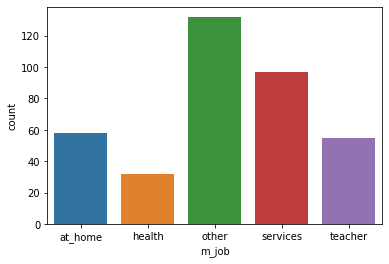

In [39]:
column_info('m_job')

Работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Уникальных значений 5. Есть пропуски, заменим пустые значения на самое часто встречающееся значение - other

In [40]:
students['m_job'] = students['m_job'].fillna(
    students.describe(include=['object']).m_job.top)

In [41]:
pd.DataFrame(students.m_job.value_counts(dropna=False, normalize=True))

,m_job
other,0.384224
services,0.246819
at_home,0.147583
teacher,0.139949
health,0.081425


**Вывод :** в колонке m_job не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - other, у больше чем 35% студентов работа матери относится к категории "другая"

### f_job

other       196
services    101
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце: 36


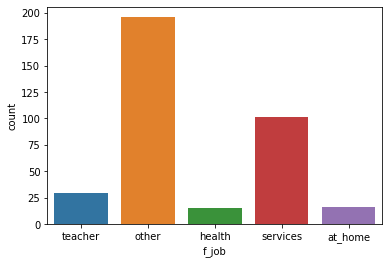

In [42]:
column_info('f_job')

работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). Уникальных значений 5. Есть пропущеные значения , заменим их на наиболее часто встречающееся значение - other

In [43]:
students['f_job'] = students['f_job'].fillna(
    students.describe(include=['object']).f_job.top)

In [44]:
pd.DataFrame(students.f_job.value_counts(dropna=False, normalize=True))

,f_job
other,0.590331
services,0.256997
teacher,0.073791
at_home,0.040712
health,0.038168


**Вывод :** в колонке f_job не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - other, у больше чем 55% студентов работа отца относится к категории "другая"

### reason

course        136
home          104
reputation    103
other          33
Name: reason, dtype: int64
Уникальных значений: 4
Пропущеных значений в столбце: 17


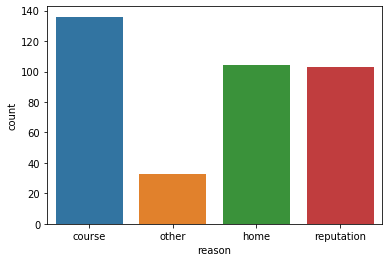

In [45]:
column_info('reason')

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). Уникальных значений 4. Есть пропущеные значения заменим их на наиболее часто встречающееся - course 

In [46]:
students['reason'] = students['reason'].fillna(
    students.describe(include=['object']).reason.top)

In [47]:
pd.DataFrame(students.reason.value_counts(dropna=False, normalize=True))

,reason
course,0.389313
home,0.264631
reputation,0.262087
other,0.083969


**Вывод :** в колонке reason не было ошибочных данных, не видели явных признаков выбросов, но были пропуски, которое мы заменили на самое часто встречающееся значение - course, примерно 36% студентов выбрали школу из-за образовательной программы

### guardian

mother    249
father     86
other      28
Name: guardian, dtype: int64
Уникальных значений: 3
Пропущеных значений в столбце: 30


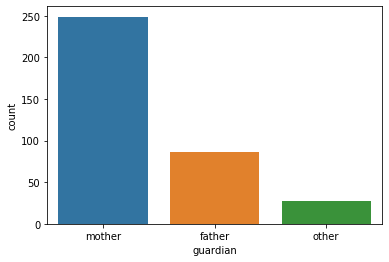

In [48]:
column_info('guardian')

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое). Уникальных значений 3. Есть пропущеные значения заменим их на наиболее часто встречающееся - mother

In [49]:
students['guardian'] = students['guardian'].fillna(
    students.describe(include=['object']).guardian.top)

In [50]:
pd.DataFrame(students.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.709924
father,0.218830
other,0.071247


**Вывод :** в колонке guardian не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - mother, у почти 69% студентов опекуном является мать

### travel_time

Медиана:  1.0
Среднее:  1.441095890410959
Пропущеных значений в столбце: 28


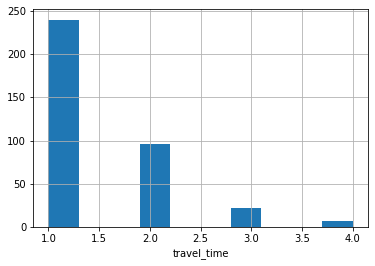

In [51]:
column_info('travel_time')

travel_time — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Пропущеных значений в столбце 28, можно заменить на случайные между 1 и 3

In [52]:
students['travel_time'] = students['travel_time'].apply(lambda x: rnd.randint(1, 3) if pd.isna(x) else x)

In [53]:
pd.DataFrame(students.travel_time.value_counts(dropna=False, normalize=True))

,travel_time
1.0,0.638677
2.0,0.259542
3.0,0.083969
4.0,0.017812


**Вывод:** в колонке traveltime не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на случайные значения от 1 до 3, почти 60% студентов живут в 15 минутах от школы

###  study_time

Медиана:  2.0
Среднее:  2.0440414507772022
Пропущеных значений в столбце: 7


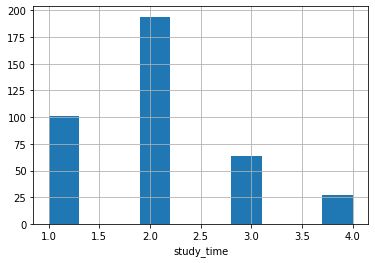

In [54]:
column_info('study_time')

study_time — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Пропущеных значений в столбце 7, в признаке studytime нет редко встречающихся признаков - поэтому пусть пустые значения меняются на любое из 4-х возможных

In [55]:
students['study_time'] = students['study_time'].apply(lambda x: rnd.randint(1, 4) if pd.isna(x) else x)

In [56]:
pd.DataFrame(students.study_time.value_counts(dropna=False, normalize=True))

,study_time
2.0,0.493639
1.0,0.264631
3.0,0.165394
4.0,0.076336


**Вывод:** в колонке studytime не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на любое из 4-х возможных, 50% студентов тратят на учебу от 2 до 5 часов

###  failures

Медиана:  0.0
Среднее:  0.32345013477088946
Пропущеных значений в столбце: 22


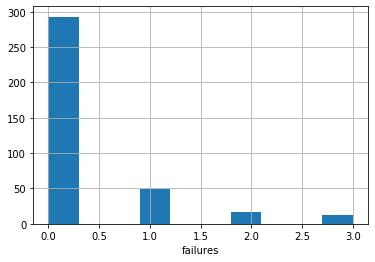

In [57]:
column_info('failures')

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4). Пропущеных значений в столбце 22, заполним пропуски медианым значением 0 

In [58]:
students['failures'] = students['failures'].apply(lambda x: 0 if pd.isna(x) else x)

In [59]:
pd.DataFrame(students.failures.value_counts(dropna=False, normalize=True))

,failures
0.0,0.801527
1.0,0.124682
2.0,0.040712
3.0,0.033079


**Вывод:** 80% с показателем 0 , по сути столбец не совсем информативный, но посмотрим какой результат может дать нам столбец failures в итоговом анализе

### school_sup

no     334
yes     51
Name: school_sup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 8


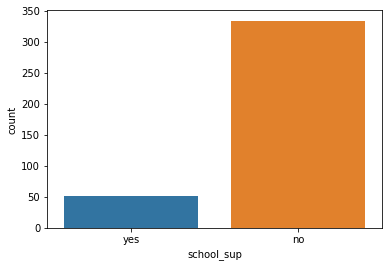

In [60]:
column_info('school_sup')

school_sup — дополнительная образовательная поддержка (yes или no).Уникальных значений 2. Пропущеных значений в столбце 8, заменим пропущеные значения на наиболее часто встречающиеся - no:

In [61]:
students['school_sup'] = students['school_sup'].fillna(
    students.describe(include=['object']).school_sup.top)

In [62]:
pd.DataFrame(students.school_sup.value_counts(dropna=False, normalize=True))

,school_sup
no,0.870229
yes,0.129771


**Вывод:** более 85% с показателем no , посмотрим какой результат может дать нам столбец school_sup в итоговом анализе

### fam_sup

yes    219
no     135
Name: fam_sup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 39


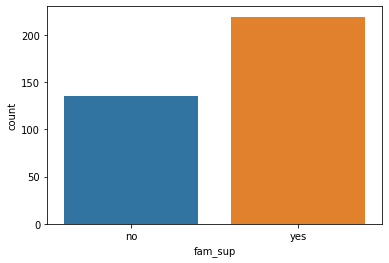

In [63]:
column_info('fam_sup')

fam_sup — семейная образовательная поддержка (yes или no). Уникальных значений 2. Пропущеных значений в столбце 39, заполним их модой , что есть наиболее часто встречающееся значение

In [64]:
students.fam_sup = students.fam_sup.apply(
    lambda x: students.fam_sup.mode()[0] if pd.isna(x) else x)

In [65]:
pd.DataFrame(students.fam_sup.value_counts(dropna=False, normalize=True))

,fam_sup
yes,0.656489
no,0.343511


**Вывод :** в колонке fam_sup не было ошибочных данных, но было некоторое количество пропусков -которые мы заменили модой yes , у 65% студентов есть семейная образовательная поддержка

###  paid

no     198
yes    155
Name: paid, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 40


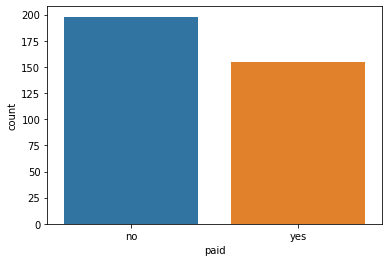

In [66]:
column_info('paid')

дополнительные платные занятия по математике (yes или no). Уникальных значений 2. Пропущеных значений в столбце 40, введем новую категорию / значение  "unknown" (неизвестно) - так как пропусков значительное количество, что может отразиться на итоговом анализе

In [67]:
students['paid'] = students['paid'].fillna('unknown')

In [68]:
pd.DataFrame(students.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.503817
yes,0.394402
unknown,0.101781


Вывод : в колонке paid не было ошибочных данных, но были пропуски - около 10%, которые мы выделили в отдельную категорию  "unknown" (неизвестно) , у 50% студентов нет дополнительных платных занятий по математике

###  activities

yes    195
no     184
Name: activities, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 14


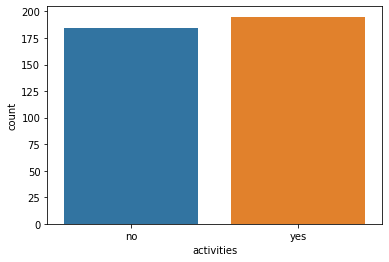

In [69]:
column_info('activities')

activities — дополнительные внеучебные занятия (yes или no). Уникальных значений 2. Пропущеных значений в столбце 14, заменим на самое часто встречающееся значение модой

In [70]:
students.activities = students.activities.apply(
    lambda x: students.activities.mode()[0] if pd.isna(x) else x)

In [71]:
pd.DataFrame(students.activities.value_counts(dropna=False, normalize=True))

,activities
yes,0.531807
no,0.468193


**Вывод :** в колонке activities не было ошибочных данных, но были пропуски, которое мы заменили на самое часто встречающееся значение - yes, студенты распределены примерно поровну

### nursery

yes    300
no      77
Name: nursery, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 16


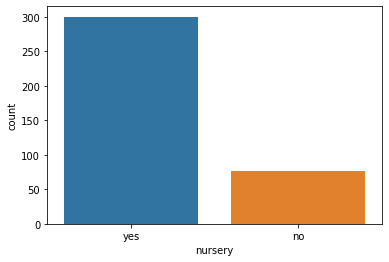

In [72]:
column_info('nursery')

nursery — посещал детский сад (yes или no). Уникальных значений 2 . Пропущеных значений в столбце 16, заменим их на наиболее часто встречающееся значение

In [73]:
students['nursery'] = students['nursery'].fillna(
    students.describe(include=['object']).nursery.top)

In [74]:
pd.DataFrame(students.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.804071
no,0.195929


**Вывод :** в колонке nursery не было ошибочных данных, но было небольшое количество пропусков, которое мы заменили на самое часто встречающееся значение - yes, примено 80% учащихся посещали детский сад

### higher

yes    356
no      18
Name: higher, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 19


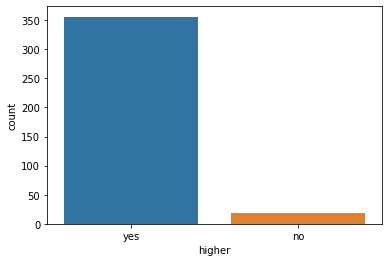

In [75]:
column_info('higher')

higher — хочет получить высшее образование (yes или no). Уникальных значений 2. Пропущеных значений в столбце 19, заполним их на наиболее часто встречающиеся:

In [76]:
students['higher'] = students['higher'].fillna(
    students.describe(include=['object']).higher.top)

In [85]:
pd.DataFrame(students.higher.value_counts(dropna=False, normalize=True))

,higher
yes,0.954198
no,0.045802


**Вывод :** в стобце более 95% студентов с стремлением получить высшее образование, что потенциально влияет на итоговый анализ по предпологаемым оценкам по математике включительно 

### internet

yes    304
no      55
Name: internet, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 34


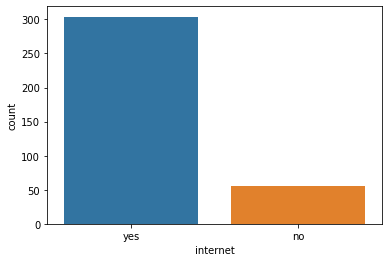

In [77]:
column_info('internet')

internet — наличие интернета дома (yes или no). Уникальных значений 2. Пропущеных значений в столбце 34, заполним наиболее часто встречающимся:

In [78]:
students['internet'] = students['internet'].fillna(
    students.describe(include=['object']).internet.top)

In [79]:
pd.DataFrame(students.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.860051
no,0.139949


**Вывод :** в колонке internet не было ошибочных данных, но было небольшое количество пропусков, которые мы заменили на самое часто встречающееся значение - yes, примено у 85% учащихся есть дома интернет

### romantic

no     239
yes    123
Name: romantic, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 31


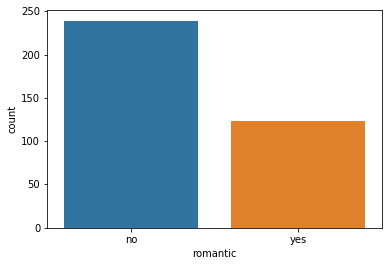

In [80]:
column_info('romantic')

romantic — в романтических отношениях (yes или no).Уникальных значений 2. Пропущеных значений в столбце 31, заполним наиболее часто встречающимся:

In [81]:
students['romantic'] = students['romantic'].fillna(
    students.describe(include=['object']).romantic.top)

In [82]:
pd.DataFrame(students.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.687023
yes,0.312977


**Вывод :** в колонке romantic не было ошибочных данных, но были пропуски в небольшом количестве, которое мы заменили на самое часто встречающееся значение - no, примено у 67% учащихся нет романтических отношений

### fam_rel

Медиана:  4.0
Среднее:  3.931693989071038
Пропущеных значений в столбце: 27


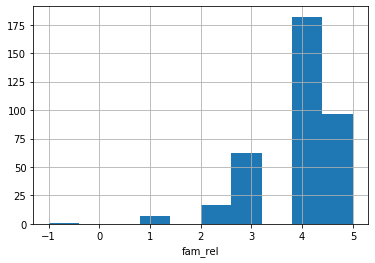

In [83]:
column_info('fam_rel')

fam_rel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Есть пропуски, большая часть значений переменной fam_rel лежит между 3 и 5 - ими и заполним пустые значения, сначала заполним их.  
Есть выбросы, одно значение уплыло и стало равным отрицательным, рассмотрим подробнее: 

In [84]:
students['fam_rel'] = students['fam_rel'].apply(lambda x: rnd.randint(3, 5) if pd.isna(x) else x)

In [85]:
students.fam_rel.value_counts(dropna=False, normalize=True)

 4.0    0.480916
 5.0    0.272265
 3.0    0.183206
 2.0    0.043257
 1.0    0.017812
-1.0    0.002545
Name: fam_rel, dtype: float64

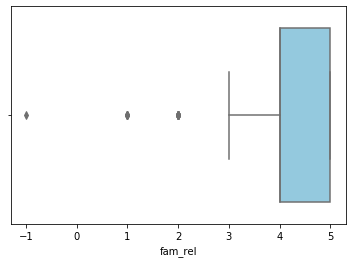

In [86]:
sns.boxplot(students.fam_rel, color='skyblue')

Видим 2 выброса , один из них ошибочный показатель - 1, так как признак не может иметь по условию отрицательных значений. Предположим, что это опечатка и можем заменить -1 на 1, но так же можем воспользоваться нашей фенкцией по удалению выброса, при этом удаляться все выбросы:

In [87]:
students = remove_outlier('fam_rel')

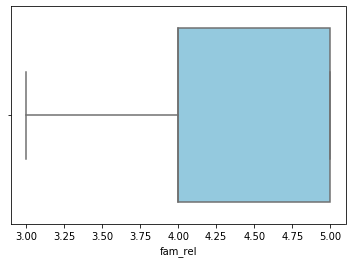

In [88]:
sns.boxplot(students.fam_rel, color='skyblue')

**Вывод :** в колонке fam_rel  были пропуски, которые мы заменили значениями между 3 и 5 , было несколько выбросов , удалили с помощью созданой функции. Примерно у половины учеников отношения в семье хорошие

### freetime

Медиана:  3.0
Среднее:  3.246498599439776
Пропущеных значений в столбце: 11


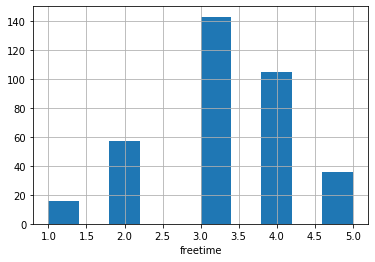

In [89]:
column_info('freetime')

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого). Пропущеных значений в столбце 11, что не так много, и можно заменить пропуски на любые из возможных значений от 1 до 5: 

In [90]:
students['freetime'] = students['freetime'].apply(lambda x: rnd.randint(1, 5) if pd.isna(x) else x)

In [91]:
pd.DataFrame(students.freetime.value_counts(dropna=False, normalize=True))

,freetime
3.0,0.394022
4.0,0.285326
2.0,0.173913
5.0,0.097826
1.0,0.048913


Значение 1 (очень мало свободного времени) выглядит как выброс, посмотрим boxplot

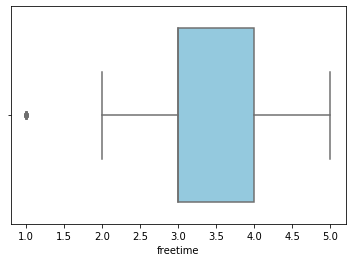

In [92]:
sns.boxplot(students.freetime, color='skyblue')

**Вывод :** в колонке freetime было несколько пропусков, заменили на любые из возможных значений от 1 до 5. Есть выброс, но не будем удалять, вдруг будет коррелировать с хорошей успеваемостью. У 40 % студентов есть свободное время.

### go_out

Медиана:  3.0
Среднее:  3.1
Пропущеных значений в столбце: 8


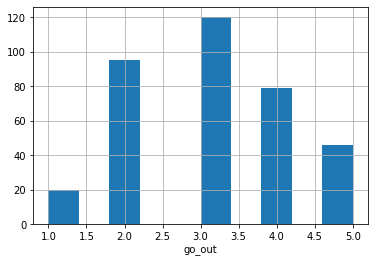

In [93]:
column_info('go_out')

go_out — проведение времени с друзьями (от 1 - очень мало до 5 - очень много). Пропущеных значений в столбце 8, заполняем как и предыдущий столбец, очень мало незаполненых значений, поэтому заполним рандомно от 1 до 5 :

In [94]:
students['go_out'] = students['go_out'].apply(lambda x: rnd.randint(1, 5) if pd.isna(x) else x)

In [95]:
pd.DataFrame(students.go_out.value_counts(dropna=False, normalize=True))

,go_out
3.0,0.342391
2.0,0.258152
4.0,0.214674
5.0,0.130435
1.0,0.054348


**Вывод:** в колонке go_out не было выбросов, но были пропуски, которые заменили на любые из возможных значений от 1 до 5. Большая часть студентов проводит время с друзьями

### health

Медиана:  4.0
Среднее:  3.575070821529745
Пропущеных значений в столбце: 15


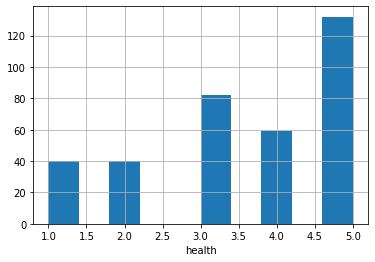

In [96]:
column_info('health')

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Пропущеных значений в столбце 15, заполним рандомно от 1 до 5 :

In [97]:
students['health'] = students['health'].apply(lambda x: rnd.randint(1, 5) if pd.isna(x) else x)

In [98]:
pd.DataFrame(students.health.value_counts(dropna=False, normalize=True))

,health
5.0,0.369565
3.0,0.228261
4.0,0.165761
2.0,0.119565
1.0,0.116848


**Вывод :** В колонке health были пропуски, которые заполнили рандомно от 1 до 5. У большей части учащихся со здоровьем все хорошо

### absences

Медиана:  4.0
Среднее:  6.254901960784314
Пропущеных значений в столбце: 11


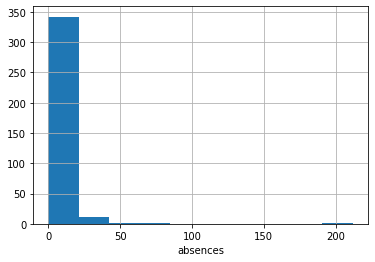

In [99]:
column_info('absences')

absences — количество пропущенных занятий. Видим, что основное распределение лежит между 0 и до 100 процентами и есть потенциальные выбросы. Пропущеных значений в столбце 11, заменим на медианое значение, т.к. она ближе к основной части значений, чем среднее: 

In [100]:
students['absences'] = students['absences'].apply(lambda x: 4 if pd.isna(x) else x)

In [101]:
pd.DataFrame(students.absences.value_counts(dropna=False, normalize=True))

,absences
0.0,0.290761
4.0,0.168478
2.0,0.157609
6.0,0.078804
8.0,0.051630
10.0,0.043478
12.0,0.027174
14.0,0.024457
3.0,0.016304
16.0,0.016304


Рассмотрим выбросы:

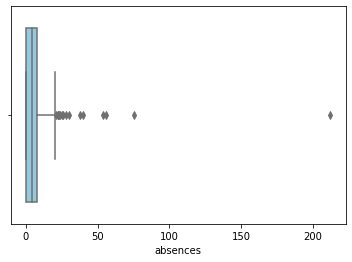

In [102]:
sns.boxplot(students.absences, color='skyblue')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


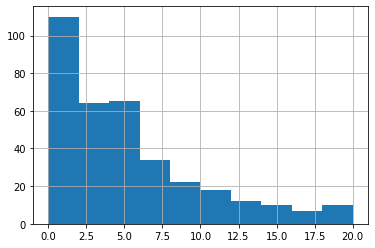

In [103]:
median = students.absences.median()
median
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist()

Границы выбросов не могут быть отрицательными. Оставим только те данные, где прогулов от 0 до 20: 

In [104]:
students = students[students['absences'].between(0, 20)|pd.isnull(students.absences)]

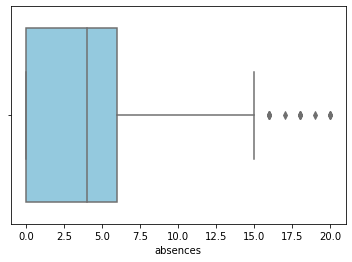

In [105]:
sns.boxplot(students.absences, color='skyblue')

Медиана:  4.0
Среднее:  4.4289772727272725
Пропущеных значений в столбце: 0
В выборке осталось учеников:  352


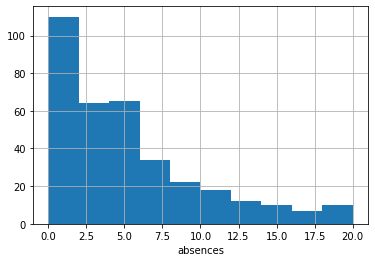

In [106]:
column_info('absences')
print('В выборке осталось учеников: ', len(students))

**Вывод :** в колонке absences были пропуски, заменили медианым значением. Было несколько выбросов, посмотрели на них с помощью boxplot, выбросы удалили с созданой функцией ранее, оставшиеся выбросы не стали удалять, т.к. на выводе в гистограмму они не выглядят устрошающе. Примерно треть учащихся занятия не пропускала. Распределение на нормальное не похоже, даже после удаления выбросов.

### score

Медиана:  55.0
Среднее:  52.57225433526011
Пропущеных значений в столбце: 6


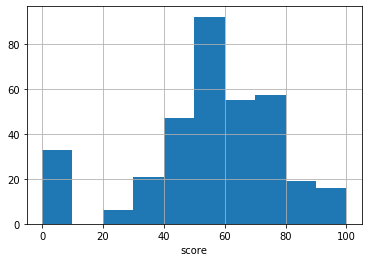

In [107]:
column_info('score')

score — баллы по госэкзамену по математике. Пропущеных значений в столбце 6, заполним пропуски медианым значением:

In [108]:
students['score'] = students['score'].apply(lambda x: 55 if pd.isna(x) else x)

In [109]:
pd.DataFrame(students.score.value_counts(dropna=False, normalize=True))

,score
50.0,0.153409
55.0,0.125000
0.0,0.093750
75.0,0.085227
60.0,0.079545
70.0,0.076705
65.0,0.076705
40.0,0.071023
45.0,0.062500
80.0,0.039773


## Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой за экзамен по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов, их у нас 12 (float64(11), int64(1))

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

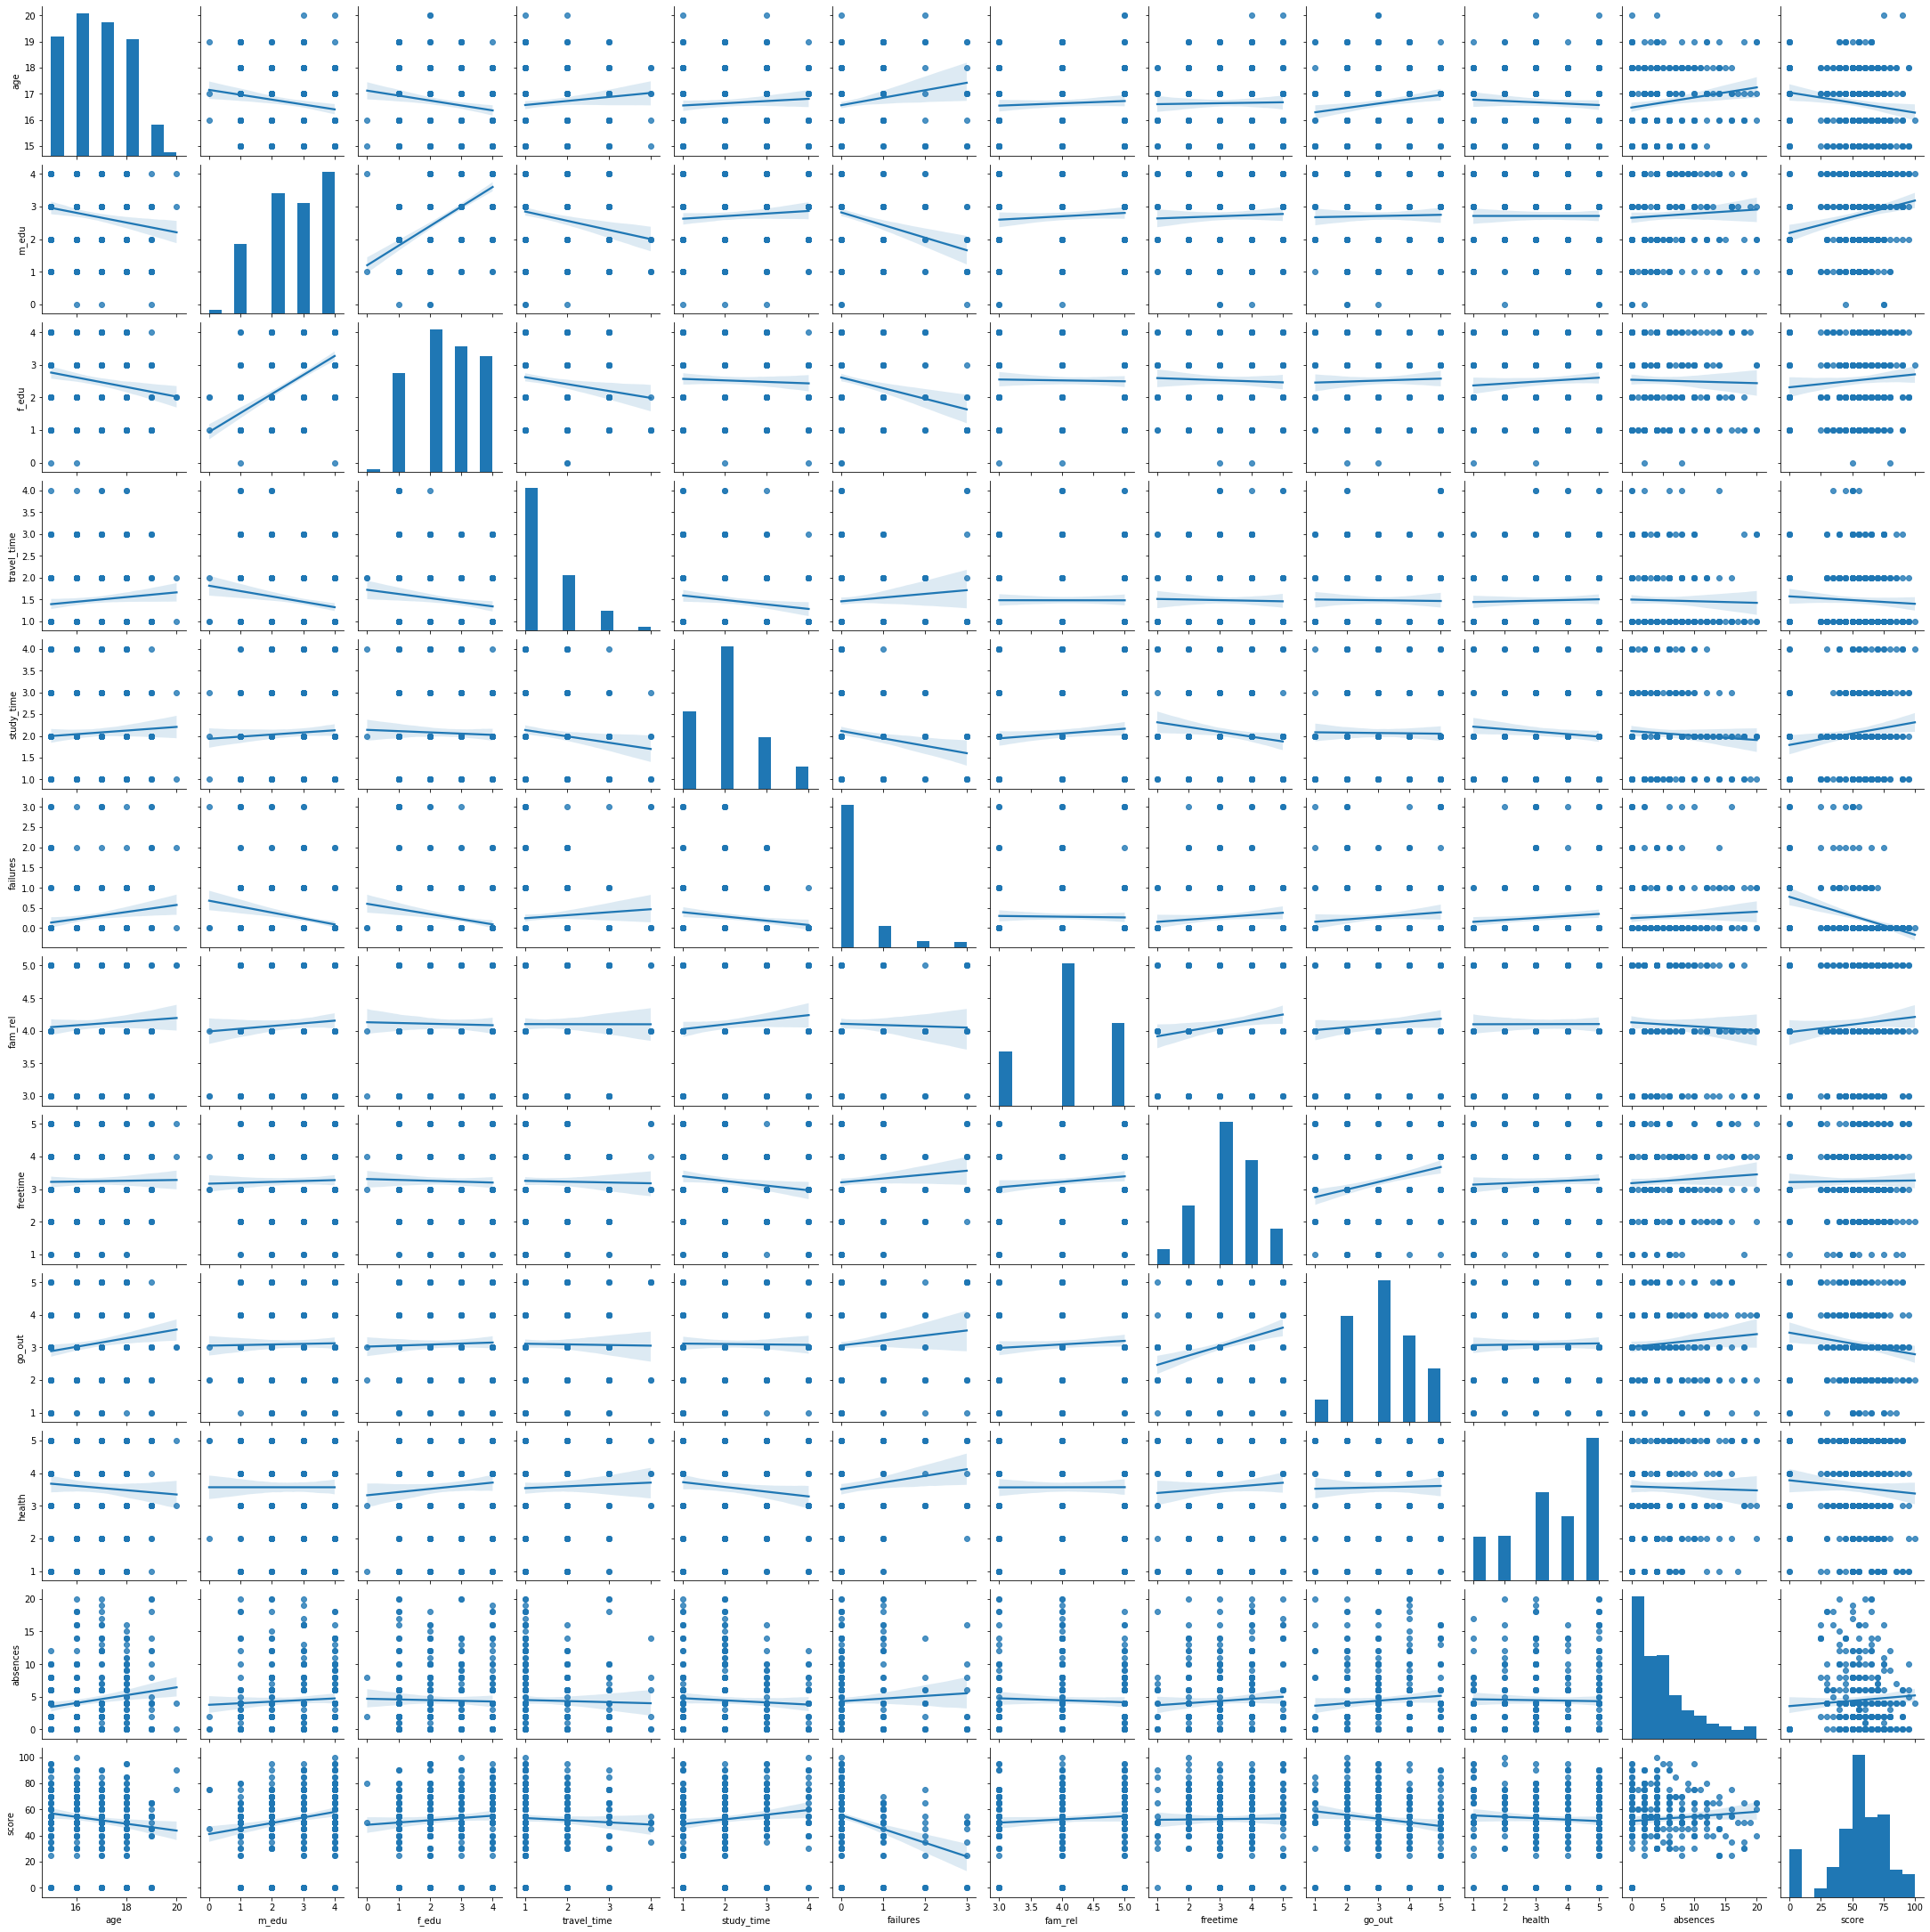

In [110]:
sns.pairplot(students, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [111]:
students.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,freetime,go_out,health,absences,score
age,1.000000,-0.167250,-0.167198,0.091443,0.059623,0.158139,0.049563,0.014578,0.148660,-0.058757,0.152426,-0.142463
m_edu,-0.167250,1.000000,0.590829,-0.186294,0.062028,-0.238255,0.065218,0.030595,0.018264,-0.000085,0.055567,0.205006
f_edu,-0.167198,0.590829,1.000000,-0.142208,-0.036436,-0.203658,-0.017911,-0.029883,0.030649,0.076169,-0.023652,0.083022
travel_time,0.091443,-0.186294,-0.142208,1.000000,-0.122383,0.079458,-0.001028,-0.018162,-0.013081,0.029879,-0.025147,-0.053305
study_time,0.059623,0.062028,-0.036436,-0.122383,1.000000,-0.133808,0.088885,-0.125858,-0.010299,-0.090923,-0.057905,0.136637
failures,0.158139,-0.238255,-0.203658,0.079458,-0.133808,1.000000,-0.018974,0.081513,0.094407,0.099640,0.056956,-0.314581
fam_rel,0.049563,0.065218,-0.017911,-0.001028,0.088885,-0.018974,1.000000,0.118245,0.068421,0.001624,-0.042900,0.076269
freetime,0.014578,0.030595,-0.029883,-0.018162,-0.125858,0.081513,0.118245,1.000000,0.256344,0.055897,0.066097,0.011191
go_out,0.148660,0.018264,0.030649,-0.013081,-0.010299,0.094407,0.068421,0.256344,1.000000,0.016896,0.086096,-0.137093
health,-0.058757,-0.000085,0.076169,0.029879,-0.090923,0.099640,0.001624,0.055897,0.016896,1.000000,-0.021646,-0.066529


**Вывод:** 

Показатели: **m_edu** ; **study_time** образования родителей, в частности матери и время на учебу помимо школы с положительным коэффициентом корреляции, что указывает на то, чем выше эти показатели, тем вероятнее студент получит более высокий балл на экзамене по математике. 

Показатели: **age** ; **failures** ; **go_out**  возраст, неудач вне школы и время с друзьями, наоборот с отрицательным показателем корреляции. Значит чем выше эти показатели, тем ниже вероятность получить более высокий балл на экзамене по математике.

## Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения баллов за экзамен в зависимости от значения этих переменных.Это можно сделать, например, с помощью box-plot (график показывает плотность распределения переменных).

Используем функцию для построения графика для каждого столбца

In [112]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Номинативные переменные, которые осталось рассмотреть: 'school', 'sex', 'address', 'fam_size', 'p_status', 'm_job','f_job', 'reason', 'guardian','school_sup', 'fam_sup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic'

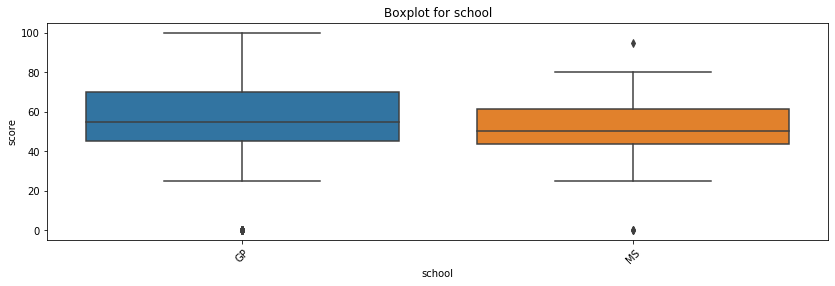

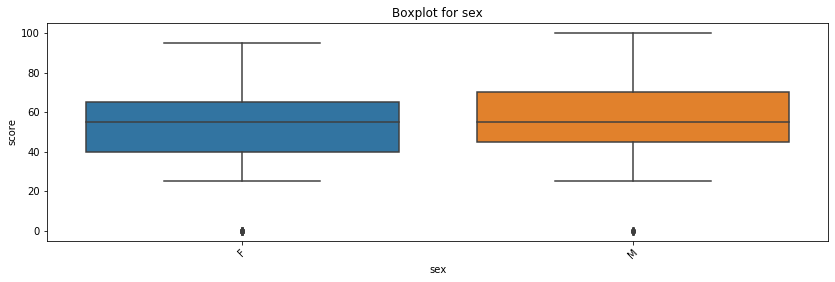

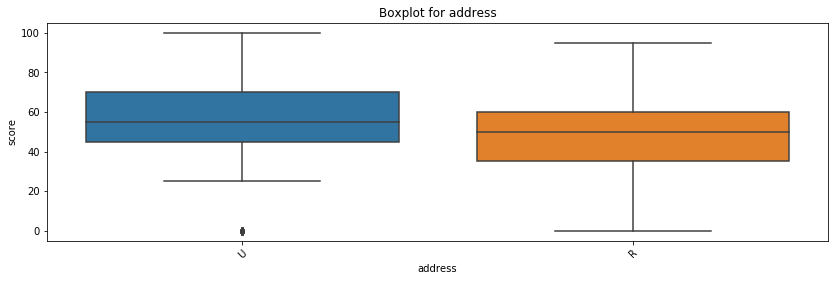

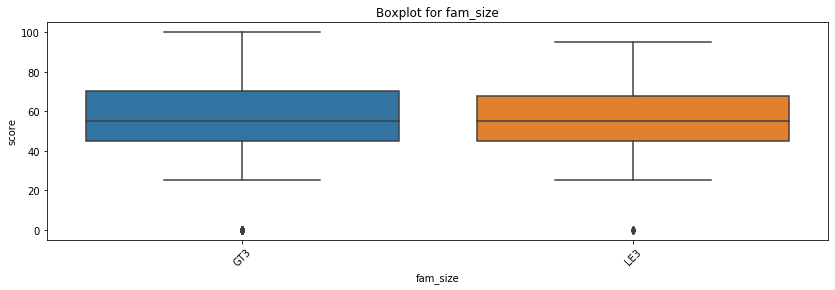

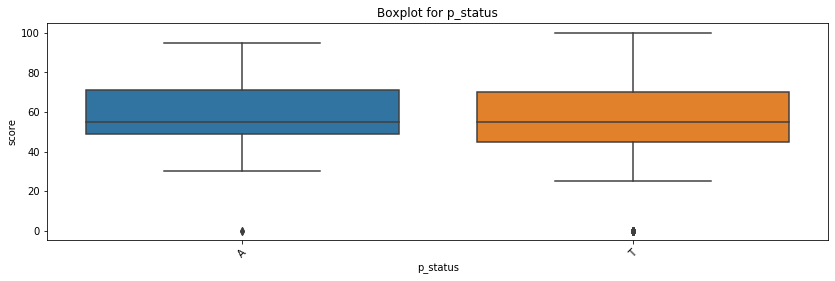

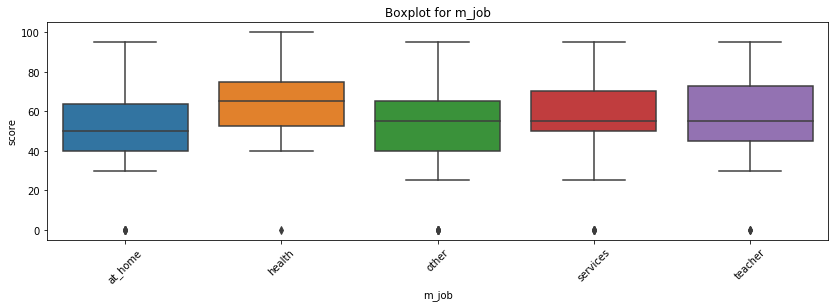

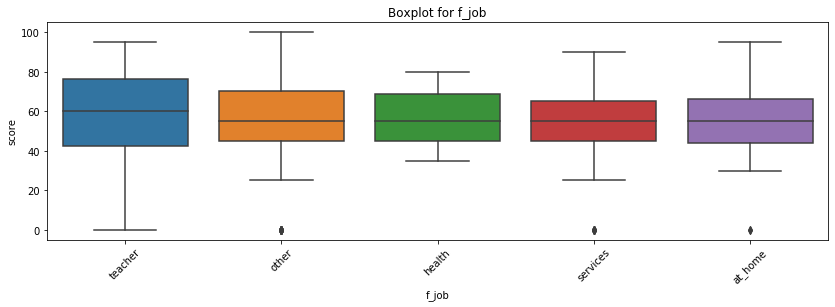

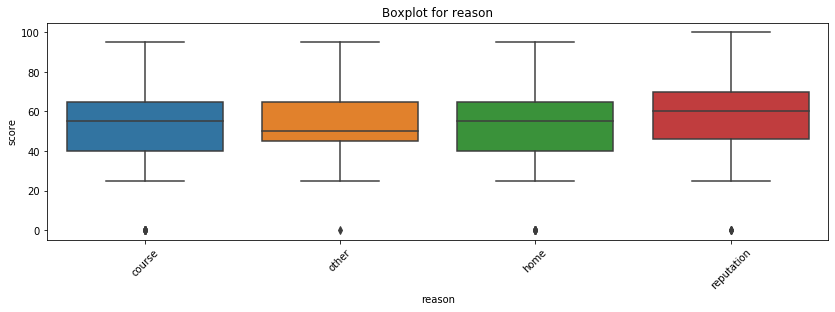

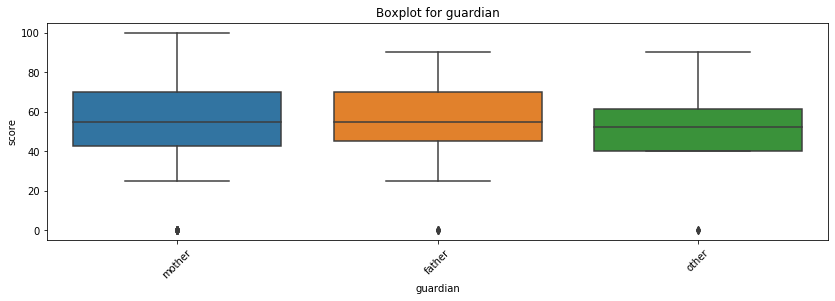

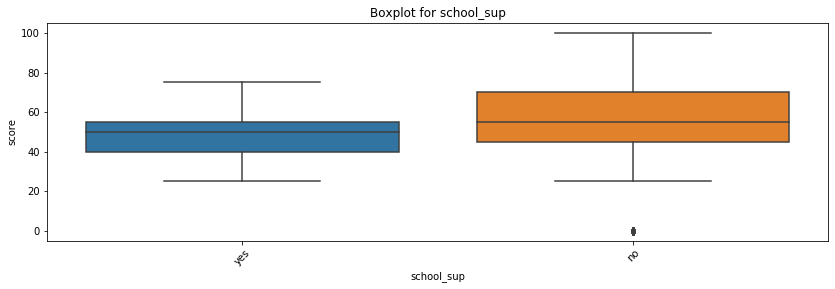

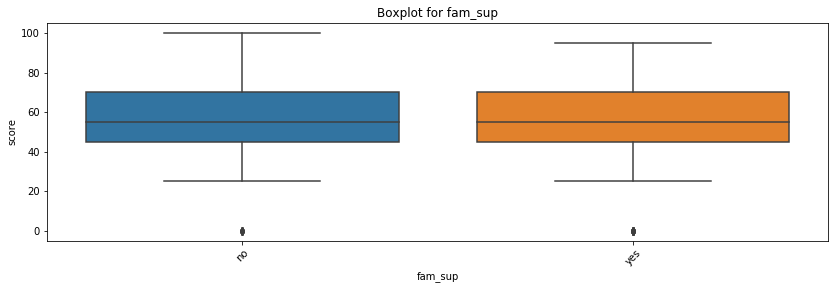

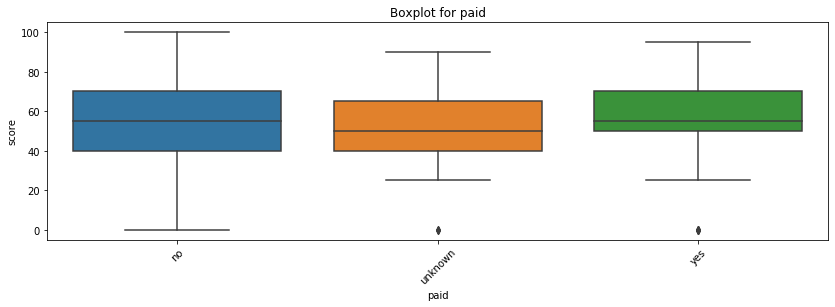

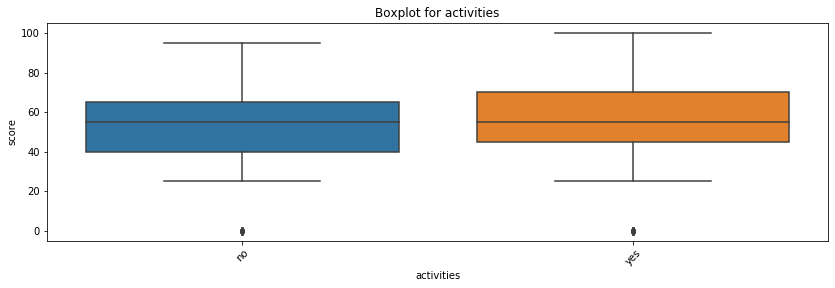

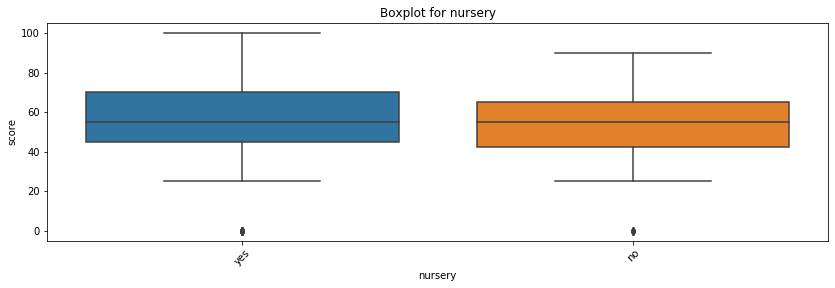

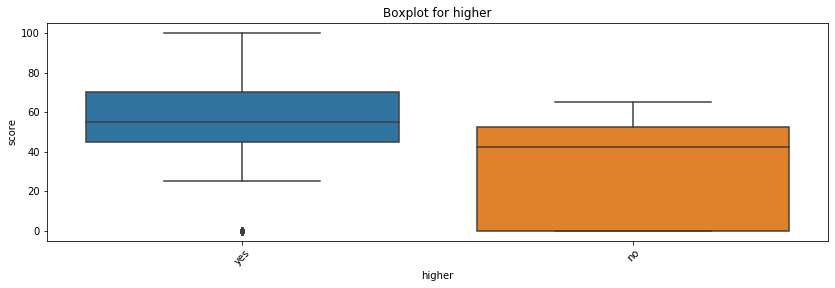

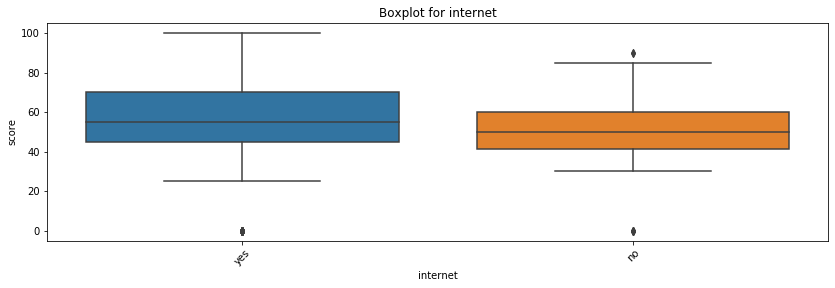

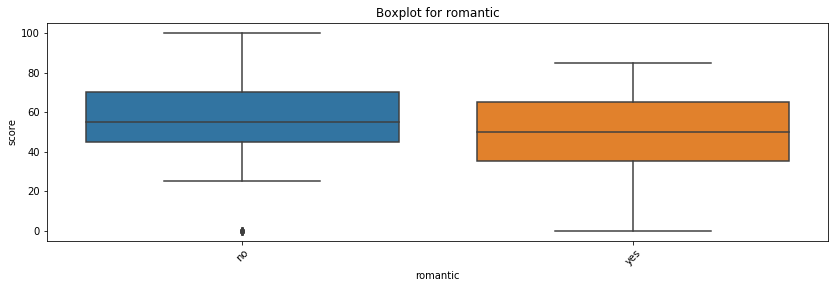

In [113]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian',
            'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что параметры: school, sex, address, fam_size, m_job, f_job, reason, higher могут влиять на показатель баллов на экзамене по математике. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента:

In [114]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [115]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian',
            'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются 5 параметров: sex, address, m_job, higher и romantic. Оставим эти переменные в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это:
m_edu, study_time, age ,m_job, failures , go_out, sex, address, m_job, higher и romantic

In [116]:
students_for_model = students.loc[:, ['m_edu', 'study_time', 'age', 'm_job',
                                      'failures', 'go_out', 'sex', 'address', 'm_job', 'higher', 'romantic']]
students_for_model.head()

,m_edu,study_time,age,m_job,failures,go_out,sex,address,m_job,higher,romantic
0,4.0,2.0,18,at_home,0.0,4.0,F,U,at_home,yes,no
1,1.0,2.0,17,at_home,0.0,3.0,F,U,at_home,yes,no
2,1.0,2.0,15,at_home,3.0,2.0,F,U,at_home,yes,no
3,4.0,3.0,15,health,0.0,2.0,F,U,health,yes,yes
4,3.0,2.0,16,other,0.0,2.0,F,U,other,yes,no


## Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска были получены следующие выводы:

В данных достаточно мало пустых значений, максимальное число пропусков не превышает 10 %, колонка paid, были найдены ошибочные данные в малом количестве.

Выбросы найдены только в столбцах age, fam_rel, absences, что позволяет сделать вывод о том, что данные достаточно чистые.

Показатели: age ; failures ; go_out возраста, неудач вне школы и время с друзьями, с отрицательным показателем корреляции. Значит чем выше эти показатели, тем ниже вероятность получить более высокий балл на экзамене по математике.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели и  оказывают влияние на оценку, это: sex, age, m_edu, address, study_time, failures , go_out, m_job, higher и romantic

В стобце higher более 95% студентов с стремлением получить высшее образование, что могло бы нам позволить его исключить из итогового , но мы исследуем группу риска поэтому вполне вероятно , что студенты из этой группы могут оказаться в числе отстающих, а именно без стремления получить в дальнейшем высшее образование

### Дополнительно:  

### комментарии по своей работе для ментора 

Хотелось бы до конца понять выводы по корреляции, не совсем визуально четко, показывает построенный график sns.pairplot(students, kind = 'reg') , возможно от того что  слишком много данных, но помогла матрица students.corr() , прочитав на форумах и на просторах интернета, можно легко запутаться в выводах , к примеру одно из того что я читала : https://instagramkurs.ru/chto-takoe-korrelirovat-korrelyaciya-eto-prostymi-slovami-kak-rasschitat.html , https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
 и данных в самом юните (приведенного примера и вывода) мало / недостаточно  чтоб основываясь на него строить выводы, но не смотря на это надеюсь к правильным выводам все-таки пришла
 
Очень хочется узнать, что будет дальше, к примеру сейчас мы сделали выводы, но наглядно этого пока не видно, влияние условий/факторов на дальнейший / предпологаемый результат студентов, возможен ли визуальный вывод, график этого , где будет четко видно влияние 

Метод боксплот вывод и сравнения, как то особо не информативен, поэтому не понятно зачем он нам был нужен, тогда как по методу стьдента нам сразу все стало ясно 

На сколько стало понятно по обсуждениям в слаке от сокурстников и менторов, замену пропущеных значений можно делать разными способами как средним, медианым, модой или рандомно в зависимости от представленой колонки/информации 
